In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [2]:
basepath = '/Users/blandt/Desktop/Data/PAR2 GFP linchpin/Experiment'
paths = direcslist(basepath, 1)
conditions = [p.split('/')[-2].split('_')[1] for p in paths]
print(set(conditions))

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_optimised.txt') for p in paths]

{'lp637', 'nwg274', 'kk1273', 'nwg214(unbalanced)', 'nwg269'}


In [3]:
imgs_straight = [straighten(i, r, 50, ninterp=500) for i, r in zip(imgs, rois)]
profiles = [bounded_mean_2d(s, [0.9, 0.1]) for s in imgs_straight]
profiles_norm = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles]

<IPython.core.display.Javascript object>


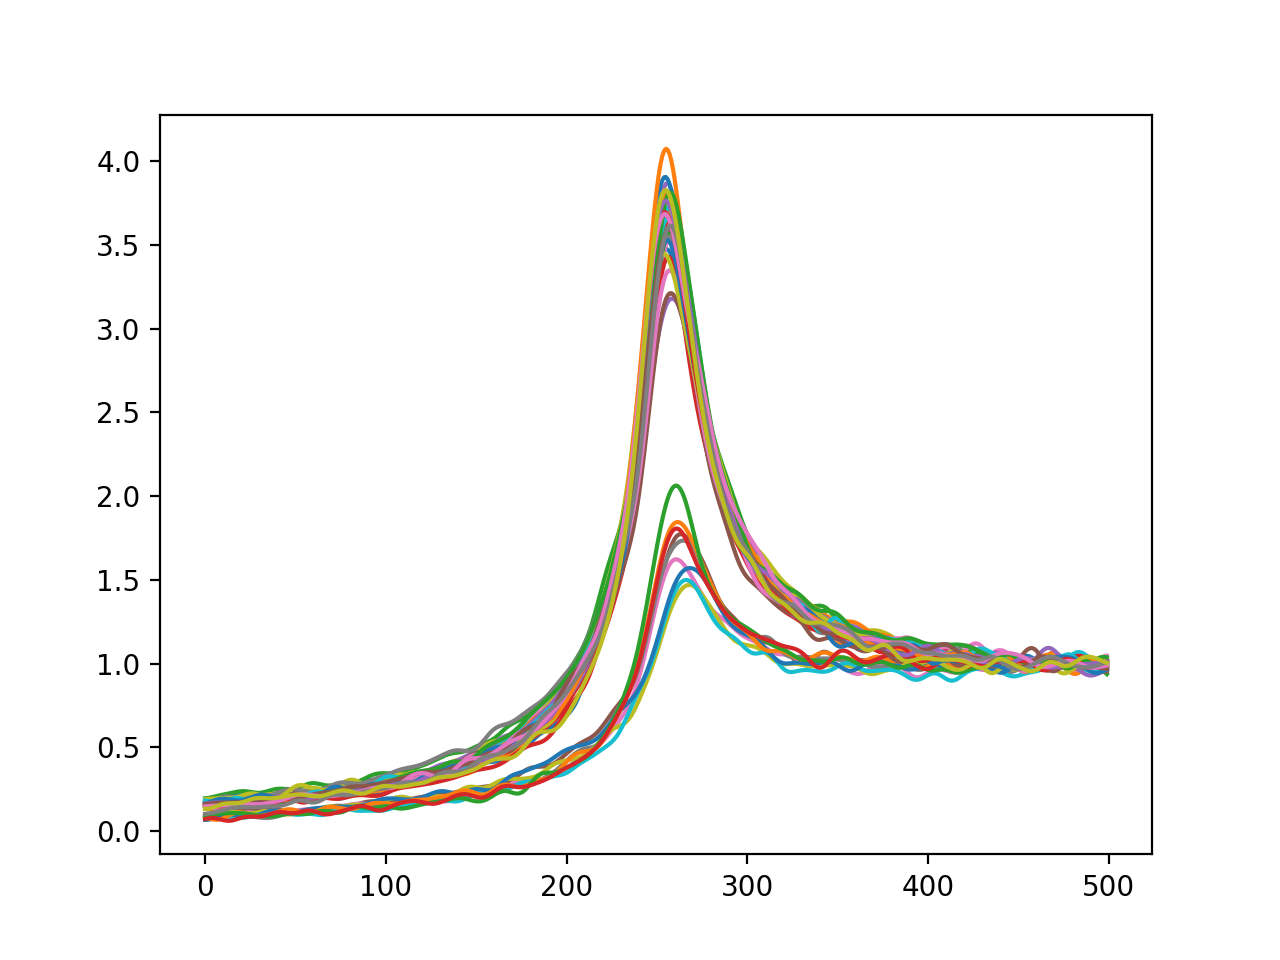

In [4]:
fig, ax = plt.subplots()
for p in profiles_norm:
    ax.plot(p)

<IPython.core.display.Javascript object>


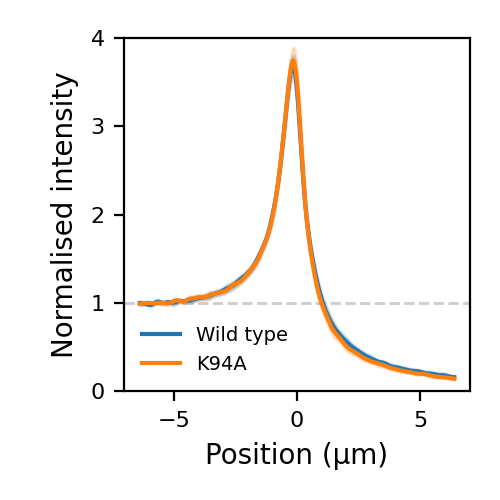

In [6]:
def func(condition, ax, c, label):
    _profiles = np.fliplr(np.array([p for p, c in zip(profiles_norm, conditions) if c == condition])) #/ 10000
    profile_mean = np.mean(_profiles, axis=0)
    profile_std = np.std(_profiles, axis=0)
    ax.plot(0.255 * np.linspace(-25, 25, 500), profile_mean, c=c, label=label)
    ax.fill_between(0.255 * np.linspace(-25, 25, 500), profile_mean - profile_std, profile_mean + profile_std, 
                   color=c, alpha=0.2)
    
 
fig, ax = plt.subplots()
func('kk1273', ax, 'tab:blue', 'Wild type')
func('nwg274', ax, 'tab:orange', 'K94A')
# func('nwg269', ax, 'tab:green', 'K351A')
# func('nwg214(unbalanced)', ax, 'tab:green', 'C56S')
ax.legend(fontsize=7, frameon=False)
ax.tick_params(axis='both', labelsize=8)
ax.axhline(1, linestyle='--', c='0.8', linewidth=1, zorder=0)
ax.set_xlabel('Position (μm)')
ax.set_ylabel('Normalised intensity')
ax.set_ylim(0, 4)
fig.set_size_inches(2.5, 2.5)
fig.tight_layout()
fig.savefig('Figs/profiles.png', dpi=600, transparent=True)